<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW11/blob/main/HW_10(FNN_part_one).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
import itertools
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels.shape

(60000,)

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.30, random_state=42)

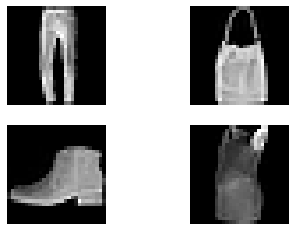

In [ ]:
# Example Imagesplt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42000, 28, 28), (18000, 28, 28), (42000,), (18000,))

In [ ]:
x_train = x_train.reshape(42000, 784)
x_test = x_test.reshape(18000, 784)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
print(x_train.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


In [ ]:
np.random.seed(50)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 100
batchSize = 300
steps_per_epoch=x_train.shape[0] // batchSize

In [ ]:
history = model.fit(x_train, y_train, batch_size=batchSize, epochs=epochs, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch)

In [ ]:
model.save("my_model_p_1")

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'\nTest loss:{test_loss},    Test accuracy:{test_acc}')

563/563 [==============================] - 2s 4ms/step - loss: 0.4007 - accuracy: 0.9015

Test loss:0.40072524547576904,    Test accuracy:0.9014999866485596


In [ ]:
print(f"Accuracy after fitting: {history.history['accuracy'][-1]*100}%")

Accuracy after fitting: 96.1976170539856%


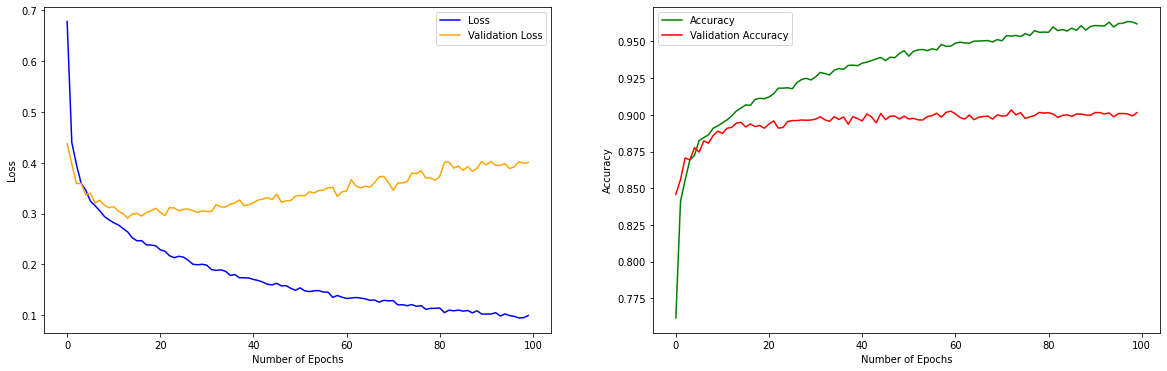

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label = "Loss")
plt.plot(history.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="green", label = "Accuracy")
plt.plot(history.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [ ]:
test_images = test_images.reshape(10000, 784)

In [ ]:
test_images = test_images.astype('float32') / 255.0

In [ ]:
test_labels = to_categorical(test_labels, 10) # One-Hot Encoding

In [ ]:
score = model.evaluate(test_images, test_labels)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]*100}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.4332 - accuracy: 0.8947
Test Loss: 0.4332337975502014
Test Accuracy: 89.46999907493591%


313/313 [==============================] - 1s 3ms/step


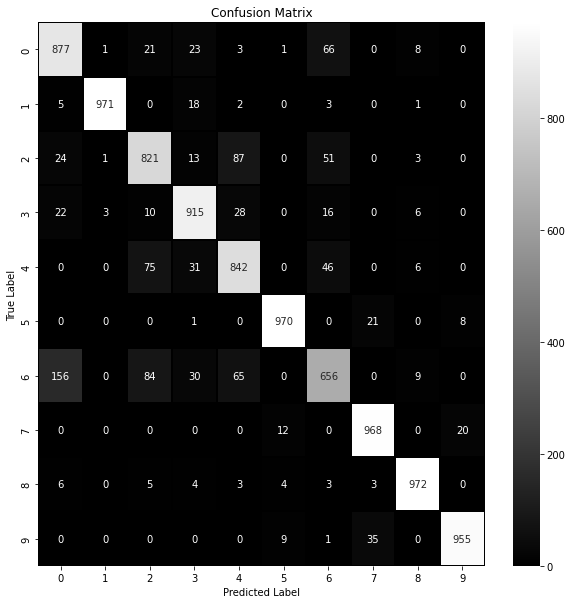

In [ ]:
import seaborn as sns

Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(test_labels, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusionMatrix)):
    print(f"Class: {str(i)}")
    print(f"Number of Wrong Prediction: {str(sum(confusionMatrix[i])-confusionMatrix[i][i])} out of 1000")
    print(f"Percentage of True Prediction: {confusionMatrix[i][i] / 10}% ")
    print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

Class: 0
Number of Wrong Prediction: 123 out of 1000
Percentage of True Prediction: 87.7% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 1
Number of Wrong Prediction: 29 out of 1000
Percentage of True Prediction: 97.1% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 2
Number of Wrong Prediction: 179 out of 1000
Percentage of True Prediction: 82.1% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 3
Number of Wrong Prediction: 85 out of 1000
Percentage of True Prediction: 91.5% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 4
Number of Wrong Prediction: 158 out of 1000
Percentage of True Prediction: 84.2% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 5
Number of Wrong Prediction: 30 out of 1000
Percentage of True Prediction: 97.0% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 6
Number of Wrong Prediction: 344 out of 1000
Percentage of True Prediction: 65.6% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 7
Number of Wrong Prediction: 32 out of 1000
Percentage of True Prediction: 96.8% 
<<<<<<<<<<

As you can see above we should focus on especially Class 6 to improve our score, Class 0 , Class 2 and Class 4